## 利用Pandas 分析股票資料

### 安裝 pandas datareader
- ! pip install pandas_datareader

In [5]:
#! pip install pandas_datareader -U

In [12]:
import pandas
tw2330 = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/tibamepy/master/data/tw2330.csv',parse_dates={'Dates':[0]})

In [13]:
tw2330.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1232 entries, 0 to 1231
Data columns (total 7 columns):
Dates        1232 non-null datetime64[ns]
Open         1232 non-null object
High         1232 non-null object
Low          1232 non-null object
Close        1232 non-null object
Adj Close    1232 non-null object
Volume       1232 non-null object
dtypes: datetime64[ns](1), object(6)
memory usage: 67.5+ KB


In [18]:
tw2330.describe()

,Dates,Open,High,Low,Close,Adj Close,Volume
count,1232,1232,1232,1232,1232,1232,1232
unique,1232,289,284,291,291,415,1200
top,2016-09-08 00:00:00,105.000000,104.500000,103.000000,105.000000,92.682137,null
freq,1,17,18,21,18,18,14
first,2013-03-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
last,2018-03-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
tw2330.dtypes

Dates        datetime64[ns]
Open                 object
High                 object
Low                  object
Close                object
Adj Close            object
Volume               object
dtype: object

In [29]:
tw2330.dropna(inplace=True)
tw2330 = tw2330[tw2330['Close'] != 'null']

In [39]:
tw2330['Close'] = tw2330['Close'].astype(float)
tw2330['Open'] = tw2330['Open'].astype(float)
tw2330['High'] = tw2330['High'].astype(float)
tw2330['Low'] = tw2330['Low'].astype(float)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

In [40]:
tw2330['Close'] .max()
tw2330['Close'] .min()
tw2330['Close'] .mean()
tw2330['Close'] .count()

1218

In [41]:
tw2330.head()

,Dates,Open,High,Low,Close,Adj Close,Volume
0,2013-03-04,104.5,104.5,101.5,102.0,87.578972,50033000
1,2013-03-05,103.5,104.0,102.5,104.0,89.296204,53913000
2,2013-03-06,104.0,104.5,103.0,104.0,89.296204,35977000
3,2013-03-07,103.5,104.0,103.0,103.0,88.437592,20518000
4,2013-03-08,103.0,104.5,102.0,103.5,88.866898,44571000


In [42]:
tw2330.tail()

,Dates,Open,High,Low,Close,Adj Close,Volume
1227,2018-02-23,241.0,245.0,241.0,245.0,245.000000,26985776
1228,2018-02-26,247.0,247.5,245.0,246.5,246.500000,35901810
1229,2018-02-27,250.5,250.5,246.0,246.0,246.000000,40818119
1230,2018-03-01,246.0,246.0,242.0,243.0,243.000000,39719984
1231,2018-03-02,240.0,241.0,238.5,240.0,240.000000,35139170


### 找出資料的中心

In [43]:
tw2330.mean()

Open     152.771429
High     153.886371
Low      151.599015
Close    152.817077
dtype: float64

In [44]:
tw2330['Close'].mean()

152.81707718719213

In [45]:
tw2330.median()

Open     142.00
High     143.50
Low      141.00
Close    142.25
dtype: float64

### 找出資料的離度

In [59]:
a = [0,42,50,60,55,72,58,80,82,87,98]
a.sort()
print(a)
pandas.Series(a).median()
pandas.Series(a).quantile(0.25) # (55 + 50) / 2
pandas.Series(a).quantile(0.75) # (80 + 82) / 2
pandas.Series(a).quantile(0.75) - pandas.Series(a).quantile(0.25)

[0, 42, 50, 55, 58, 60, 72, 80, 82, 87, 98]


28.5

In [60]:
pandas.Series(a).describe()

count    11.000000
mean     62.181818
std      26.835865
min       0.000000
25%      52.500000
50%      60.000000
75%      81.000000
max      98.000000
dtype: float64

In [62]:
sa = pandas.Series(a)
IQR = sa.quantile(0.75) - sa.quantile(0.25)
max(sa.min(), sa.median() - 1.5 * IQR)
min(sa.max(), sa.median() + 1.5 * IQR)


17.25

Populating the interactive namespace from numpy and matplotlib


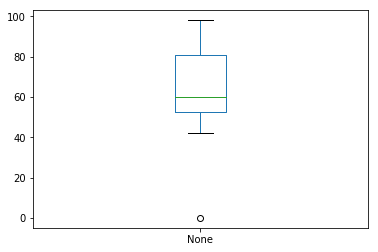

In [63]:
%pylab inline
sa.plot(kind='box')

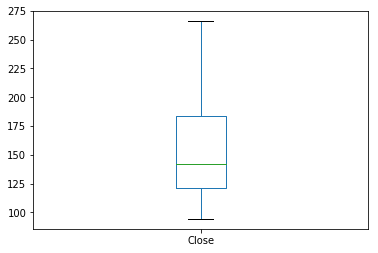

In [65]:
tw2330['Close'].plot(kind= 'box')

In [88]:
import random
temp = pandas.Series([random.randint(0,38) for i in range(1,100)])
print(temp.mean(), temp.median())


19.555555555555557 19.0


In [89]:
temp = temp.append(pandas.Series([999,999,999]) )
print(temp.mean(), temp.median())

48.36274509803921 19.5


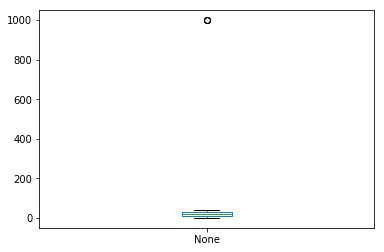

In [90]:
temp.plot(kind= 'box')

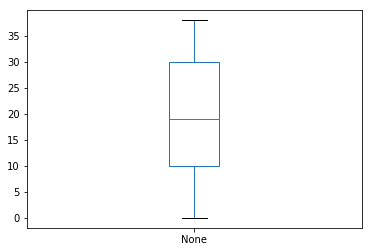

In [91]:
temp[temp < 50].plot(kind= 'box')

### 讀取實價登錄資訊

In [5]:
import pandas
lvr_url = 'https://raw.githubusercontent.com/ywchiu/cathayr/master/data/lvr_prices.csv'
lvr_prices = pandas.read_csv(lvr_url, index_col=0)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
house = lvr_prices[lvr_prices['trading_target'] == '房地(土地+建物)']
house = house[(house['area'] == '大安區') | (house['area'] =='中山區')]

In [7]:
house = house[['area', 'total_price']]
daan = house[house['area'] == '大安區']
zhongshan = house[house['area'] == '中山區']

### 增加Matplotlib 中文字型
- C:\ProgramData\Anaconda3\Lib\site-packages\matplotlib\mpl-data
- 修改 matplotlibrc
- 將 line 199 font.family         : sans-serif 前面的註解拿掉
- 將 line 211 font.sans-serif 前面的註解拿掉
- 增加 Microsoft YaHei
- 變成 font.sans-serif     : Microsoft YaHei,

Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


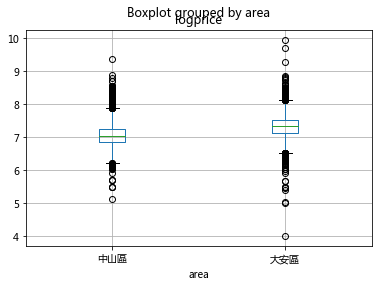

In [8]:
%pylab inline
import numpy as np
house['logprice'] = np.log10(house['total_price']) 
house.boxplot(column='logprice',by='area')

In [79]:
import pandas_datareader
apple = pandas_datareader.get_data_google('AAPL')

C:\ProgramData\Anaconda3\lib\site-packages\pandas_datareader\google\daily.py:40: UnstableAPIWarning: 
The Google Finance API has not been stable since late 2017. Requests seem
to fail at random. Failure is especially common when bulk downloading.

  warnings.warn(UNSTABLE_WARNING, UnstableAPIWarning)


In [16]:
apple.head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,30.49,30.64,30.34,30.57,123432050
2010-01-05,30.66,30.80,30.46,30.63,150476004
2010-01-06,30.63,30.75,30.11,30.14,138039594
2010-01-07,30.25,30.29,29.86,30.08,119282324
2010-01-08,30.04,30.29,29.87,30.28,111969081
